### Мулихов Артур Б01-818, топологическая сортировка
 
За основу взят алгоритм поиска в глубину:

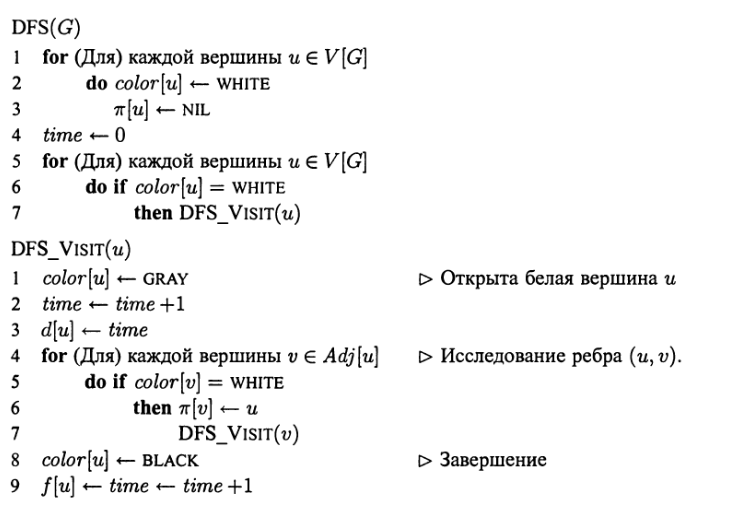

Время работы топологической сортировки: $\Theta (V + E)$. Тк именно столько работает поиск в глубину

In [279]:
import numpy as np
import re

In [280]:
data = [
    '1: 2 (1) 3 (2) ; 2: 3 (5) ; 3: ;',
    '1: 2 (10) 4 (5) 3 (1) 3 (1) ; 2: 4 (1) ; 3: 4 (3) 2 (1) 5 (1) ; 4: ; 5: 4 (2) ;',
    '1: 2 (10) 4 (5) 3 (1) 3 (1) ; 2: 4 (1) ; 3: 4 (3) 2 (1) ; 4: ;'
]

In [281]:
def parse_input(s: str):
    vertex = list(map(lambda x : int(x[:-1]), re.findall(r'\d+:', s)))
    adj_lists = []
    weight_lists = []
    
    # последний элемент при таком сплите всегда пустая строка
    for i in s.split(';')[:-1]:
        adj_lists.append(
            list(map(lambda x : int(x[1:-1]), re.findall(r'\s\d+\s', i)))
        )
        weight_lists.append(
            list(map(lambda x : int(x[1:-1]), re.findall(r'\(\d+\)', i)))
        )
        
    assert len(vertex) == len(adj_lists)
    
    adjs = {
        vertex[i] : adj_lists[i] for i in range(len(vertex))
    }
    
    weights = {
        vertex[i] : weight_lists[i] for i in range(len(vertex))
    }
    return adjs, weights

In [282]:
class Graph:
    def __init__(self, s: str):
        adjs, weights = parse_input(s)        
        # сортируем вершины в списке смежности, чтобы вершины с ребрами
        # вес которых меньше шли раньше в топологической сортировке
        self.adjs = {
            v : [
                x for _, x in sorted(zip(weights[v], adjs[v]), key=lambda pair: pair[0], reverse=True)
            ] for v in adjs
        }
        self.V = list(self.adjs.keys())
        pass
        
        
    def _topological_sort_util(self, v: int, visited: dict, stack: list):
        # красим вершину
        visited[v] = True
        
        for i in self.adjs[v]:
            # красим потомка, если он не покрашен
            if visited[i] == False:
                self._topological_sort_util(i, visited, stack)
 
        # добавляем текущую вершину в стек
        stack.append(v)
        pass
 
    def topological_sort(self):
        visited = {v : False for v in self.V}
        stack = []
 
        for i in self.V:
            if visited[i] == False:
                self._topological_sort_util(i, visited, stack)
 
        return stack[::-1]

In [286]:
for s in data:
    g = Graph(s)
    print(f'Input graph: \n {s}')
    print(f'Topoligcal sroted vertex: \n {g.topological_sort()}')
    print()

Input graph: 
 1: 2 (1) 3 (2) ; 2: 3 (5) ; 3: ;
Topoligcal sroted vertex: 
 [1, 2, 3]

Input graph: 
 1: 2 (10) 4 (5) 3 (1) 3 (1) ; 2: 4 (1) ; 3: 4 (3) 2 (1) 5 (1) ; 4: ; 5: 4 (2) ;
Topoligcal sroted vertex: 
 [1, 3, 5, 2, 4]

Input graph: 
 1: 2 (10) 4 (5) 3 (1) 3 (1) ; 2: 4 (1) ; 3: 4 (3) 2 (1) ; 4: ;
Topoligcal sroted vertex: 
 [1, 3, 2, 4]

